<a href="https://colab.research.google.com/github/kleimenova/gtkstudy/blob/main/TP4b_project_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read this before continuing
This notebook uses `condacolab` package, which simplifies instalation and setup of `ROOT` package. Unfortunately the `condacolab` commands need to be run as the first Code cell!

Once you run `condacolab.install()`, the Python kernel will be restarted. This is normal and expected. After that, you can continue running the cells below like normal.

Do not use the `Run all` option. Run the `condacolab` cell individually and wait for the kernel to restart. Only then, you can run all cells if you want.

In [1]:
# Load the Drive helper and mount
# Do it once
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


# TP4b first week
To do list:
- Read documentation on NA62, pay attention to kaon beamline setup
- Have a look at the GTK paper
- Study this notebook
  - Plot variables that we will need for matching reconstructed kaon from K3pi and kaon track from GTK
  - Fit relevant distributions and find resolutions
- If above is done, try to compute matching discriminant and plot it (hint: I would add it as a variable to the copy of TTree)

First we install packages that we are going to use:
- `conda` for `root`
- `root` to open `.root` and read `TTree`
- `zfit` for fitting

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:22
🔁 Restarting kernel...


In [1]:
!conda install -c conda-forge root
!pip install -q uproot
!pip install -q tensorflow==2.6.2 #specific versions for compatability with zfit
!pip install -q zfit

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

# Study basic GTK parameters
Load root file and have a look at what is inside

In [2]:
import numpy as np
import uproot
import pandas as pd
import matplotlib.pyplot as pl
import matplotlib.colors as mcolors
import copy
import ROOT
import zfit

/usr/local/lib/python3.8/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Welcome to JupyROOT 6.26/08


/usr/local/lib/python3.8/site-packages/zfit/__init__.py:62: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


In [3]:
# This is just how I like quickly setup plots, change to whatever you like:
colormap = copy.copy(pl.cm.get_cmap("viridis")) # rainbow
colormap.set_under('w',1)

textsize=18
plotw=10
ploth=8

pl.rc('xtick',labelsize=textsize)
pl.rc('ytick',labelsize=textsize)
pl.rc('axes', linewidth = 2)

### NA62 Run 1, Run 9001

In [4]:
# Set file path as in your setup:
FilePath="/content/drive/MyDrive/TP4b/Data/Run009001_gtk_tp4b_1802.root"
myFile = ROOT.TFile.Open(FilePath)
myTree = myFile.GTKStudyTtree
# Don't mind warnings, they are related to the NA62FW ROOT dictionary, which we don't have setup here

Warning in <TClass::Init>: no dictionary for class Stream is available
Warning in <TClass::Init>: no dictionary for class RecoInfo is available
Warning in <TClass::Init>: no dictionary for class AnalysisInfo is available
Warning in <TClass::Init>: no dictionary for class CheckPointInfo is available
Warning in <TClass::Init>: no dictionary for class NA62Analysis::Core::AnalyzerIdentifier is available
Warning in <TClass::Init>: no dictionary for class MCInfo is available
Warning in <TClass::Init>: no dictionary for class BeamLineInfo is available


In [5]:
# Check the branches:
myTree.Show(0)

======> EVENT:0
 RunID           = 9001
 BurstID         = 1
 EventID         = 10059
 EventTS         = 49486261
 InstantaneousIntensity = 185.185
 K3piVertex_x    = 53.7267
 K3piVertex_y    = 2.73911
 K3piVertex_z    = 141683
 K3piVertex_t    = 17.9379
 K3piKTAG_t      = 17.8034
 K3piKTAG_nsectors = 6
 K3piTotalMom_Px = 93.6885
 K3piTotalMom_Py = 1.32014
 K3piTotalMom_Pz = 75818.8
 K3piVertexGTK3_x = 5.24355
 K3piVertexGTK3_y = 2.08316
 K3piVertexGTK3_z = 102400
 K3piTotalMomGTK3_Px = 93.4278
 K3piTotalMomGTK3_Py = 1.29883
 K3piTotalMomGTK3_Pz = 75818.8
 GTKTrackGTK3_x  = (vector<float>*)0x10578270
 GTKTrackGTK3_y  = (vector<float>*)0x105282e0
 GTKTrack_t      = (vector<float>*)0x104e6790
 GTKTrack_Px     = (vector<float>*)0x1054d070
 GTKTrack_Py     = (vector<float>*)0x104e50f0
 GTKTrack_Pz     = (vector<float>*)0x104e44f0
 GTKTrack_chi2   = (vector<float>*)0x10536400
 GTKTrack_nhits  = (vector<float>*)0x104ee220
 GTKHit_x        = (vector<float>*)0x1058c2a0
 GTKHit_y        = (vect

In [ ]:
# Took me 25' on google collabs..
# fill dx, dy, dt, dPx, dPy, dPz:
dx=[]
dy=[]
dt=[]
dPx=[]
dPy=[]
dPz=[]
for entry in myTree:
    for x,y,t,px,py,pz in zip(entry.GTKTrackGTK3_x, entry.GTKTrackGTK3_y, entry.GTKTrack_t, entry.GTKTrack_Px, entry.GTKTrack_Py, entry.GTKTrack_Pz):

        if np.abs(t-entry.K3piKTAG_t)>1:
            continue
        
        dx.append(x-entry.K3piVertexGTK3_x)
        dy.append(y-entry.K3piVertexGTK3_y)
        dt.append(t-entry.K3piKTAG_t)
        dPx.append(px-entry.K3piTotalMom_Px)
        dPy.append(py-entry.K3piTotalMom_Py)
        dPz.append(pz-entry.K3piTotalMom_Pz)
        

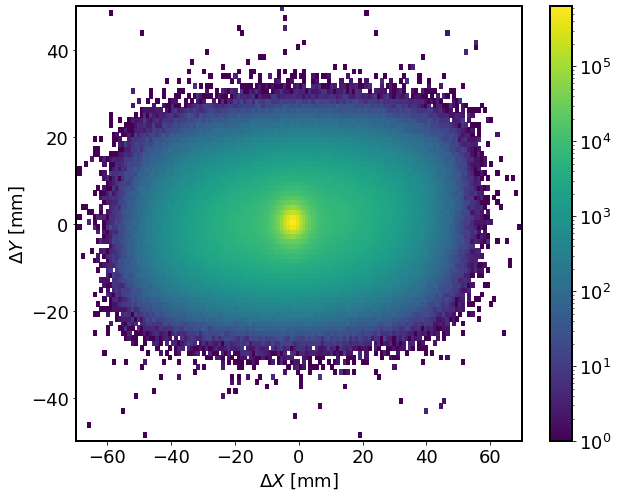

In [ ]:
# Vertex position vs GTK track position @ GTK3
fig, ax= pl.subplots(figsize=(plotw,ploth))

h = ax.hist2d(dx, dy, bins=[300, 300], cmap=colormap, norm=mcolors.LogNorm())
ax.set_xlabel(r'$\Delta X$ [mm]', fontsize=textsize)
ax.set_ylabel(r'$\Delta Y$ [mm]', fontsize=textsize)

ax.set_xlim(-70, 70)
ax.set_ylim(-50, 50)

pl.colorbar(h[3], ax=ax)  # show color scale

In [ ]:
# This function is needed for rewriting parameters of zfit vaariables
all_params = {}

def get_param(name, value=None, lower=None, upper=None, step_size=None, **kwargs):
    """Either create a parameter or return existing if a parameter with this name already exists.

    If anything else than *name* is given, this will be used to change the existing parameter.

    Args:
        name: Name of the Parameter
        value : starting value
        lower : lower limit
        upper : upper limit
        step_size : step size

    Returns:
        ``zfit.Parameter``
    """
    if name in all_params:
        parameter = all_params[name]
        if lower is not None:
            parameter.lower = lower
        if upper is not None:
            parameter.upper = upper
        if step_size is not None:
            parameter.step_size = step_size
        if value is not None:
            parameter.set_value(value)
        return parameter

    # otherwise create new one
    parameter = zfit.Parameter(name, value, lower, upper, step_size)
    all_params[name] = parameter
    return parameter

In [ ]:
# Prepare fit function:
# Why do we use triple gauss?
counts, bin_edges = np.histogram(dx)

obs = zfit.Space('x', limits=(-20, 20))

mu1 = get_param("mu1", -1.5, -2, 1)
sigma1 = get_param("sigma1", 1.5,  0.8, 2)
gauss1 = zfit.pdf.Gauss(obs=obs, mu=mu1, sigma=sigma1)

mu2 = get_param("mu2", -2, -5, 1)
sigma2 = get_param("sigma2", 20,  10, 120)
gauss2 = zfit.pdf.Gauss(obs=obs, mu=mu2, sigma=sigma2)

mu3 = get_param("mu3", -2, -5, 1)
sigma3 = get_param("sigma3", 5,  3, 20)
gauss3 = zfit.pdf.Gauss(obs=obs, mu=mu3, sigma=sigma3)

frac1 = get_param("frac_gauss1", 0.7, 0, 1)
frac2 = get_param("frac_gauss2", 0.1, 0, 1)
model = zfit.pdf.SumPDF([gauss1, gauss2, gauss3], fracs=[frac1, frac2])

In [ ]:
# Takes ~20' in Collab
# Prepare and apply fit
# Stage 1: create an unbinned likelihood with the given PDF and dataset
data_np = np.array(dx)
data = zfit.Data.from_numpy(obs=obs, array=data_np[np.abs(data_np)<20.])
nll = zfit.loss.UnbinnedNLL(model=model, data=data)
# Stage 2: instantiate a minimiser (in this case a basic minuit)
minimizer = zfit.minimize.Minuit()
# Stage 3: minimise the given negative likelihood
result = minimizer.minimize(nll)
param_errors = result.hesse(method="minuit_hesse")

In [ ]:
print("Function minimum:", result.fmin)
print("Converged:", result.converged)
print(result)

Function minimum: -1492044.2990513532
Converged: True
FitResult of
<UnbinnedNLL model=[<zfit.<class 'zfit.models.functor.SumPDF'>  params=[Composed_autoparam_31, frac_gauss1, frac_gauss2]] data=[<zfit.core.data.Data object at 0x7fdca9225700>] constraints=[]> 
with
<Minuit Minuit tol=0.001>

╒═════════╤═════════════╤══════════════════╤═════════╤═════════════╕
│ valid   │ converged   │ param at limit   │ edm     │ min value   │
╞═════════╪═════════════╪══════════════════╪═════════╪═════════════╡
│ True    │ True        │ False            │ 7.3e-05 │ -1492044    │
╘═════════╧═════════════╧══════════════════╧═════════╧═════════════╛

Parameters
name           value  (rounded)        hesse    at limit
-----------  ------------------  -----------  ----------
frac_gauss1              0.3809  +/- 0.00095       False
frac_gauss2            0.357616  +/- 0.00036       False
mu1                    -1.75325  +/- 0.00097       False
sigma1                  1.36729  +/-  0.0017       False
mu20     

Text(0, 0.5, 'Counts/0.3 mm')

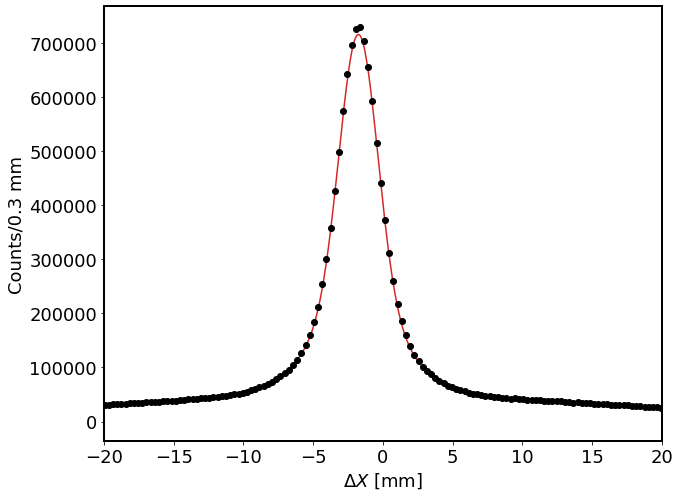

In [ ]:
fig, ax= pl.subplots(figsize=(plotw,ploth))

nbins = 400
x_range = [-20, 20]

counts, bin_edges = np.histogram(dx, bins=nbins, range=(x_range[0], x_range[1]))
bin_centres = (bin_edges[:-1]+bin_edges[1:])/2.
err = np.sqrt(counts)
ax.errorbar(bin_centres, counts, yerr=err, fmt='o', color='black')

lower, upper = obs.limits
numpoint=1000
x_plot = np.linspace(lower[-1][0], upper[0][0], num=numpoint)
y_plot = zfit.run(model.pdf(x_plot, norm_range=obs))

ax.plot(x_plot, y_plot*np.sum(counts)*numpoint/(nbins*np.sum(y_plot)), color='tab:red')

ax.set_xlim(-20, 20)

ax.set_xlabel(r'$\Delta X$ [mm]', fontsize=textsize)
ax.set_ylabel(r'Counts/0.3 mm', fontsize=textsize)

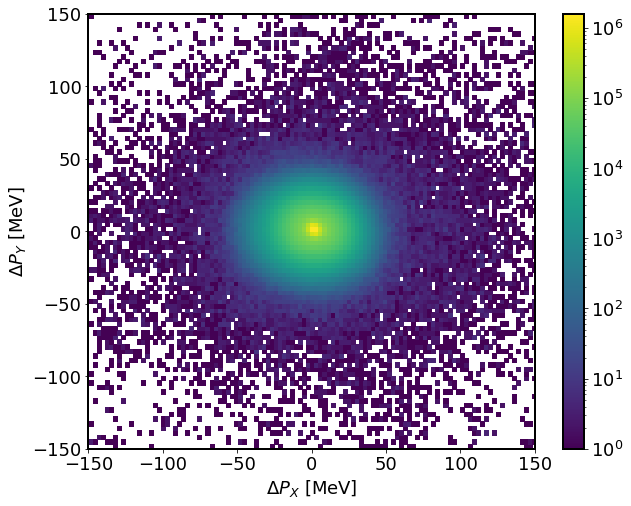

In [ ]:
# Vertex position vs GTK track position @ GTK3
fig, ax= pl.subplots(figsize=(plotw,ploth))

h = ax.hist2d(dPx, dPy, bins=[300, 300], cmap=colormap, norm=mcolors.LogNorm())
ax.set_xlabel(r'$\Delta P_X$ [MeV]', fontsize=textsize)
ax.set_ylabel(r'$\Delta P_Y$ [MeV]', fontsize=textsize)

ax.set_xlim(-150, 150)
ax.set_ylim(-150, 150)

pl.colorbar(h[3], ax=ax)  # show color scale